# **Лабораторный практикум по Математическому Моделированию**

## **Тема: Изучение процедур ode.. в MATLAm**

#### **Выполнил**: Гусаров Андрей Александрович(ПИН-44)(gusarov2906@gmail.com)

#### **Преподаватель**: Гурьянов М.А., кафедра ВМ-1

#### <span style="color:#777777"> Лабораторная работа № 4</span>

#### <span style="color:#777777">2 семестр, 2021 год</span>

#### <span style="color:#777777">МИЭТ, Зеленоград</span>

#### Постановка задачи

1. Возьмем функцию y=t.^2 и будем считать ее решением задачи Коши для дифференциального уравнения первого порядка.
    Получим это дифференциальное уравнение y'=2*t и начальное условие y(0)=0. Изучим порядок использования процедур ode.. (например, help ode45) и другие сопутствующие команды. Создадим m-файл функцию yp.m, описывающую правую часть нашего дифференциального уравнения:

    function yp=yp(t,y)
    %
    yp=2*t;

    Запустите какую-либо процедуру решения этой задачи Коши, например

    [t,Y]=ode45('yp',[0 3],0);

    и выполните построение графиков известной функции y=t.^2 и результата численного решения задачи Коши Y(t) (Y в верхнем регистре)

    plot(t,t^2,'g+',t,Y,'r')

    Спланируйте и проведите исследование процедур ode.., используя то, что ответ Вам известен.
 
2. В примере пункта 1. правую часть диффернциального уравнения можно записать и другим способом: 2*sqrt(y).

    Создадим другой m-файл функцию yp2.m, описывающую правую часть нашего дифференциального уравнения:

    function yp=yp2(t,y)
    %
    yp=2*sqrt(y);

    и снова решим задачу Коши с нулевым начальным условием. Построим соответствующие графики. Что, шокированы? Попытайтесь найти причину такого результата.
    Подсказка: измените начальное условие, возьмите, например, t=1, y(1)=? Теперь все в порядке?

    Сделайте практический вывод для себя.

3. Попробуем теперь решить задачу Коши для дифференциального уравнения второго порядка. Возьмем известную функцию, например, y=cos(t):

    y''=-cos(t) или y''=-y

    y(0)=1
    y'(0)=0

    Чтобы можно было воспользоваться MATLABом сначала сведем эту задачу к системе из двух дифференциальных уравнений первого порядка. Будем считать саму функцию y первой координатой двумерной функции Y (т.е. Y(1) или на языке MATLAB Y(:,1)),  а ее первую производную y' второй (т.е. Y(2) или на языке MATLAB Y(:,2)). Тогда с учетом того, что y мы придумали сами имеем первое уравнение системы

    Y'(1)=-sin(t)

    второе

    Y'(2)=-cos(t) или Y'(2)=-Y(1)

    Если эту систему записать в матричной форме, то слева получим вектор-столбец из производных компонент вектор-функции Y, а справа вектор-столбец из функций
    [-sin(t); -cos(t)] или чтобы выглядело пострашнее [-sin(t); -Y(1)].

    Создадим m-файл функцию yp3.m, описывающую правую часть нашей системы дифференциальных уравнений:

    function yp=yp3(t,y)
    %
    yp=[-sin(t);-y(1)];

    Исследуем решения, например так:

    [t,YY]=ode45('yp3',[0 2*pi],[1 0]);

    plot(t,cos(t),'r+',t,YY)

    plot(t,cos(t),'r+',t,YY(:,1))

    В чем разница между последними графиками?

#### Аналитическое исследование

Задача Коши для системы обыкновенных дифференциальных уравнений:
\begin{align}
\tag{1}
\frac{d u_i}{d t} &= f_i (t, u_1, u_2, \ldots, u_n),
\quad t > 0 \\ 
\tag{2}
u_i(0) &= u_i^0, \quad i = 1, 2, \ldots, m.
\end{align}

Используя векторные обозначения, задачу (1), (2) можно записать как задачу Коши:
\begin{align}
\tag{3}
\frac{d {u}}{d t} &= {F}(t, {u}), \quad t > 0, \\ 
\tag{4}
{u}(0) &= {u}_0
\end{align}

В задаче Коши необходимо по известному решению в точке t=0 необходимо найти из уравнения (3) решение при других t. <br><br>

Одношаговый метод Рунге—Кутта в общем виде записывается следующим образом:
\begin{equation}
\tag{5}
\frac{{y}^{n+1} - {y}^n}{\tau} = \sum_{i = 1}^s b_i {k}_i,
\end{equation}

где
\begin{equation}
\tag{6}
{k}_i = {F}\left( t_n + c_i\tau, {y}^n + \tau \sum_{j=1}^s a_{ij}{k}_j
\right), \quad i = 1, 2, \ldots, s.
\end{equation}

#### Численное решение

##### 1.

Алгоритм решения:
1. Напишем скрипт-функцию возвращающую значение для функции $y' = 2t$.
2. Посчитаем значение функции $y = t^2$ в точке 0.
3. Вызовем процедуру ode45 для данной функции на интервале [0;3] и начальным значением равным значению y(0).
4. Построим на графике две функции: $y = t^2$ и результата численного решения задачи Коши, полученные в предыдущем пункте.
5. Повторим 2-4 шаг с другими функциями ode... и сравним полученные графики.

In [1]:
%%file scripts/yp.m
function yp=yp(t,y)
yp=2*t;

Created file 'C:\Users\user\Documents\Jupiter\MathModeling_Course\Lab4\scripts\yp.m'.


In [2]:
addpath("scripts")
[t,Y]=ode45('yp',[0 3],0);

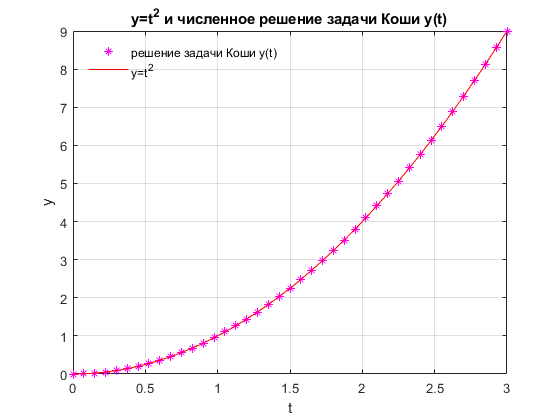

In [3]:
plot(t,t.^2,'m*',t,Y,'r')
title("y=t^2 и численное решение задачи Коши y(t)")
xlabel("t")
ylabel("y")
legend("решение задачи Коши y(t)","y=t^2", "Location", "northwest")
legend("boxoff")
grid on;
saveas(gcf, "images/graph1.png")

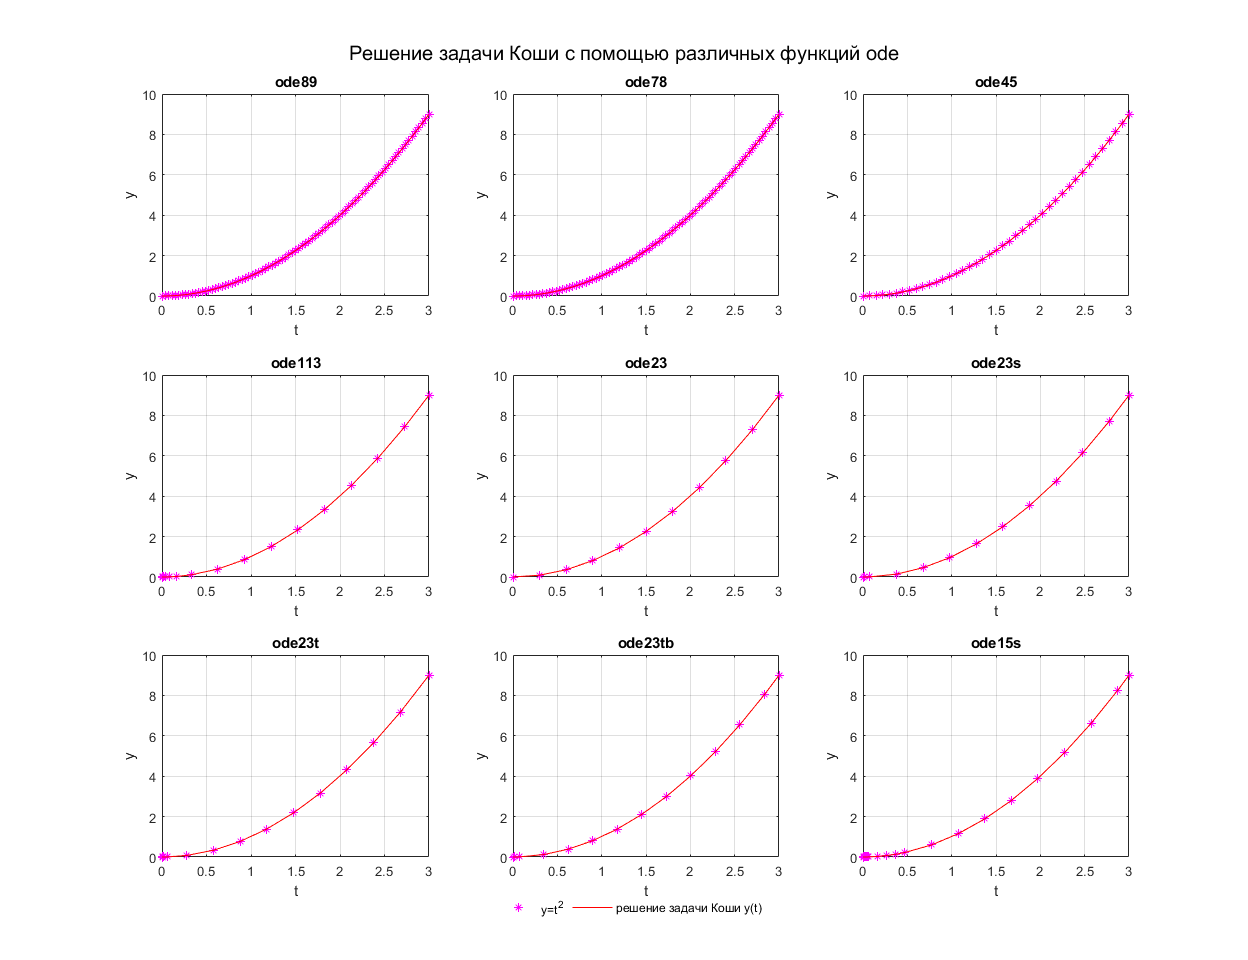

In [4]:
addpath("scripts")
set(gcf, 'PaperSize', [13 10], 'PaperPosition', [0 0 13 10])
sgtitle("Решение задачи Коши с помощью различных функций ode")

[t,Y]=ode89('yp',[0 3],0);
subplot(3,3,1)
plot(t,t.^2,'m*',t,Y,'r')
title("ode89")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode78('yp',[0 3],0);
subplot(3,3,2)
plot(t,t.^2,'m*',t,Y,'r')
title("ode78")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode45('yp',[0 3],0);
subplot(3,3,3)
plot(t,t.^2,'m*',t,Y,'r')
title("ode45")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode113('yp',[0 3],0);
subplot(3,3,4)
plot(t,t.^2,'m*',t,Y,'r')
title("ode113")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23('yp',[0 3],0);
subplot(3,3,5)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23s('yp',[0 3],0);
subplot(3,3,6)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23s")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23t('yp',[0 3],0);
subplot(3,3,7)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23t")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23tb('yp',[0 3],0);
subplot(3,3,8)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23tb")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode15s('yp',[0 3],0);
subplot(3,3,9)
plot(t,t.^2,'m*',t,Y,'r')
title("ode15s")
xlabel("t")
ylabel("y")
grid on;

leg1=legend("y=t^2", "решение задачи Коши y(t)", "Location", "southoutside", "NumColumns", 2);
legend("boxoff")
set(leg1,'Position',[0.5 0.05 0.01 0.01]);
saveas(gcf, "images/graph2.png")

#### 2.

Алгоритм решения:
1. Напишем скрипт-функцию возвращающую значение для функции $y'=2*\sqrt{y}$.
2. Посчитаем значение функции $y = t^2$ в точке 0.
3. Вызовем процедуру ode45 для данной функции на интервале [0;3] и начальным значением равным значению y(0).
4. Построим на графике две функции: $y = t^2$ и результата численного решения задачи Коши, полученные в предыдущем пункте.
5. Повторим 3-4 шаг с другими функциями ode... и оценим результат.
6. Посчитаем значение функции$y = t^2$ в точке 1.
7. Вызовем процедуру ode45 для данной функции на интервале [1;3] и начальным значением равным значению y(1).
8. Повторим шаг 4
9. Повторим 7-8 шаг с другими функциями ode... и сравним полученные графики с графиками из пункта 5.

In [5]:
%%file scripts/yp2.m
function yp=yp2(t,y)
yp=2*sqrt(y);

Created file 'C:\Users\user\Documents\Jupiter\MathModeling_Course\Lab4\scripts\yp2.m'.


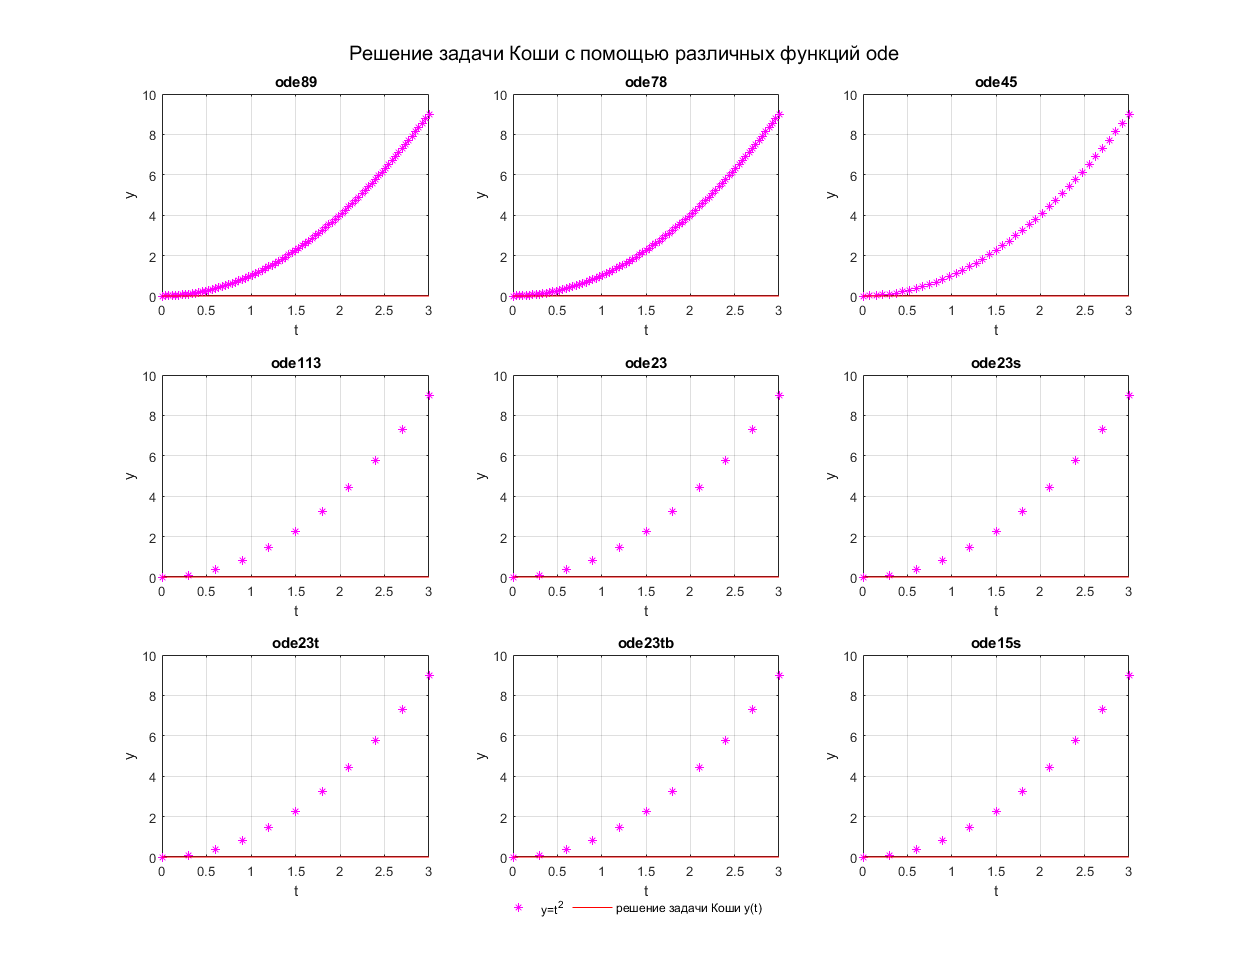

In [6]:
addpath("scripts")
set(gcf, 'PaperSize', [13 10], 'PaperPosition', [0 0 13 10])
sgtitle("Решение задачи Коши с помощью различных функций ode")

[t,Y]=ode89('yp2',[0 3],0);
subplot(3,3,1)
plot(t,t.^2,'m*',t,Y,'r')
title("ode89")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode78('yp2',[0 3],0);
subplot(3,3,2)
plot(t,t.^2,'m*',t,Y,'r')
title("ode78")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode45('yp2',[0 3],0);
subplot(3,3,3)
plot(t,t.^2,'m*',t,Y,'r')
title("ode45")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode113('yp2',[0 3],0);
subplot(3,3,4)
plot(t,t.^2,'m*',t,Y,'r')
title("ode113")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23('yp2',[0 3],0);
subplot(3,3,5)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23s('yp2',[0 3],0);
subplot(3,3,6)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23s")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23t('yp2',[0 3],0);
subplot(3,3,7)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23t")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23tb('yp2',[0 3],0);
subplot(3,3,8)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23tb")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode15s('yp2',[0 3],0);
subplot(3,3,9)
plot(t,t.^2,'m*',t,Y,'r')
title("ode15s")
xlabel("t")
ylabel("y")
grid on;

leg1=legend("y=t^2", "решение задачи Коши y(t)", "Location", "southoutside", "NumColumns", 2);
legend("boxoff")
set(leg1,'Position',[0.5 0.05 0.01 0.01]);
saveas(gcf, "images/graph3.png")

По графикам выше можем заметить что процедуры ode... выдали некорретные решения.

Это связано с тем что мы указали точку начального условия в нуле, однако данная функция(y = 2*sqrt(y)) не имеет произодную в нуле ($(\sqrt(x)' = \frac{1}{cos^2(x)} и x = 0$ => деление на ноль). 

Поробуем взять точку начального условия в единице, чтобы убедится что функции работают корретно:

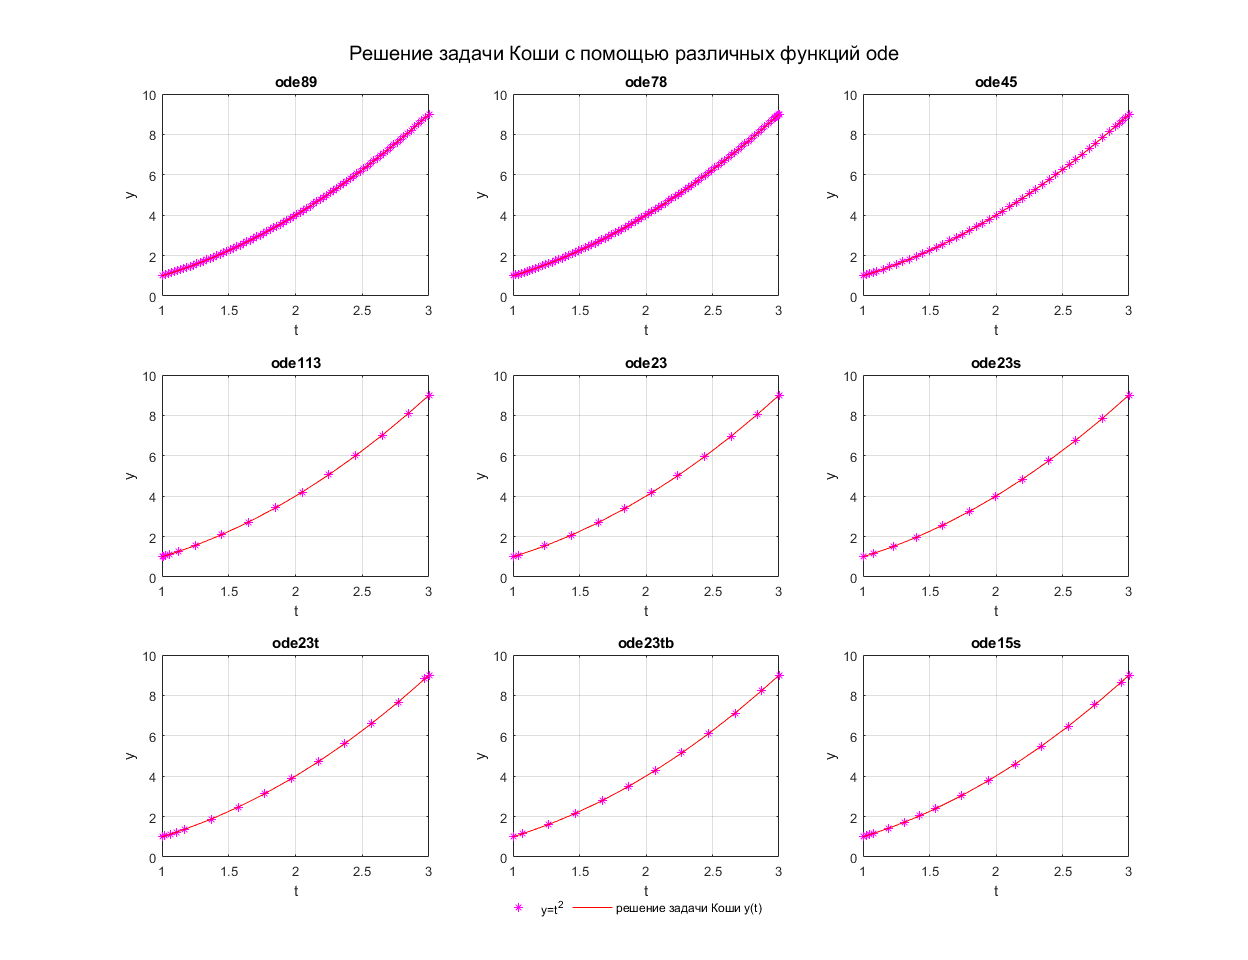

In [7]:
addpath("scripts")
set(gcf, 'PaperSize', [13 10], 'PaperPosition', [0 0 13 10])
sgtitle("Решение задачи Коши с помощью различных функций ode")

[t,Y]=ode89('yp2',[1 3],1);
subplot(3,3,1)
plot(t,t.^2,'m*',t,Y,'r')
title("ode89")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode78('yp2',[1 3],1);
subplot(3,3,2)
plot(t,t.^2,'m*',t,Y,'r')
title("ode78")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode45('yp2',[1 3],1);
subplot(3,3,3)
plot(t,t.^2,'m*',t,Y,'r')
title("ode45")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode113('yp2',[1 3],1);
subplot(3,3,4)
plot(t,t.^2,'m*',t,Y,'r')
title("ode113")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23('yp2',[1 3],1);
subplot(3,3,5)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23s('yp2',[1 3],1);
subplot(3,3,6)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23s")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23t('yp2',[1 3],1);
subplot(3,3,7)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23t")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23tb('yp2',[1 3],1);
subplot(3,3,8)
plot(t,t.^2,'m*',t,Y,'r')
title("ode23tb")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode15s('yp2',[1 3],1);
subplot(3,3,9)
plot(t,t.^2,'m*',t,Y,'r')
title("ode15s")
xlabel("t")
ylabel("y")
grid on;

leg1=legend("y=t^2", "решение задачи Коши y(t)", "Location", "southoutside", "NumColumns", 2);
legend("boxoff")
set(leg1,'Position',[0.5 0.05 0.01 0.01]);
saveas(gcf, "images/graph4.png")

#### 3.

Алгоритм решения:
1. Напишем скрипт-функцию возвращающую значение для функции $y`` = -cos(t)$ или $y`` = -y(1)$.
2. Посчитаем значение функции $y = cos(t)$ в точке 0 и 2$\pi$.
3. Вызовем процедуру ode45 для данной функции на интервале [0;2*pi] и вектором начальных значений включающим значения y(0) и y(2$\pi$)
4. Построим на графике две функции: $y =cos(t)$ и результата численного решения задачи Коши, полученные в предыдущем пункте.
5. Повторим 3-4 шаг с другими функциями ode... и оценим результат.
6. Изменим функцию построения графика добавив к результатам численного решения задачи Коши(:,1) что скрыть ненужный график
7. Повторим 3-4 шаг с другими функциями ode... c учетом предыдущего пункта и сравним полученные графики с графиками из пункта 5.

In [8]:
%%file scripts/yp3.m
function yp=yp3(t,y)
yp = [-sin(t);-y(1)];

Created file 'C:\Users\user\Documents\Jupiter\MathModeling_Course\Lab4\scripts\yp3.m'.


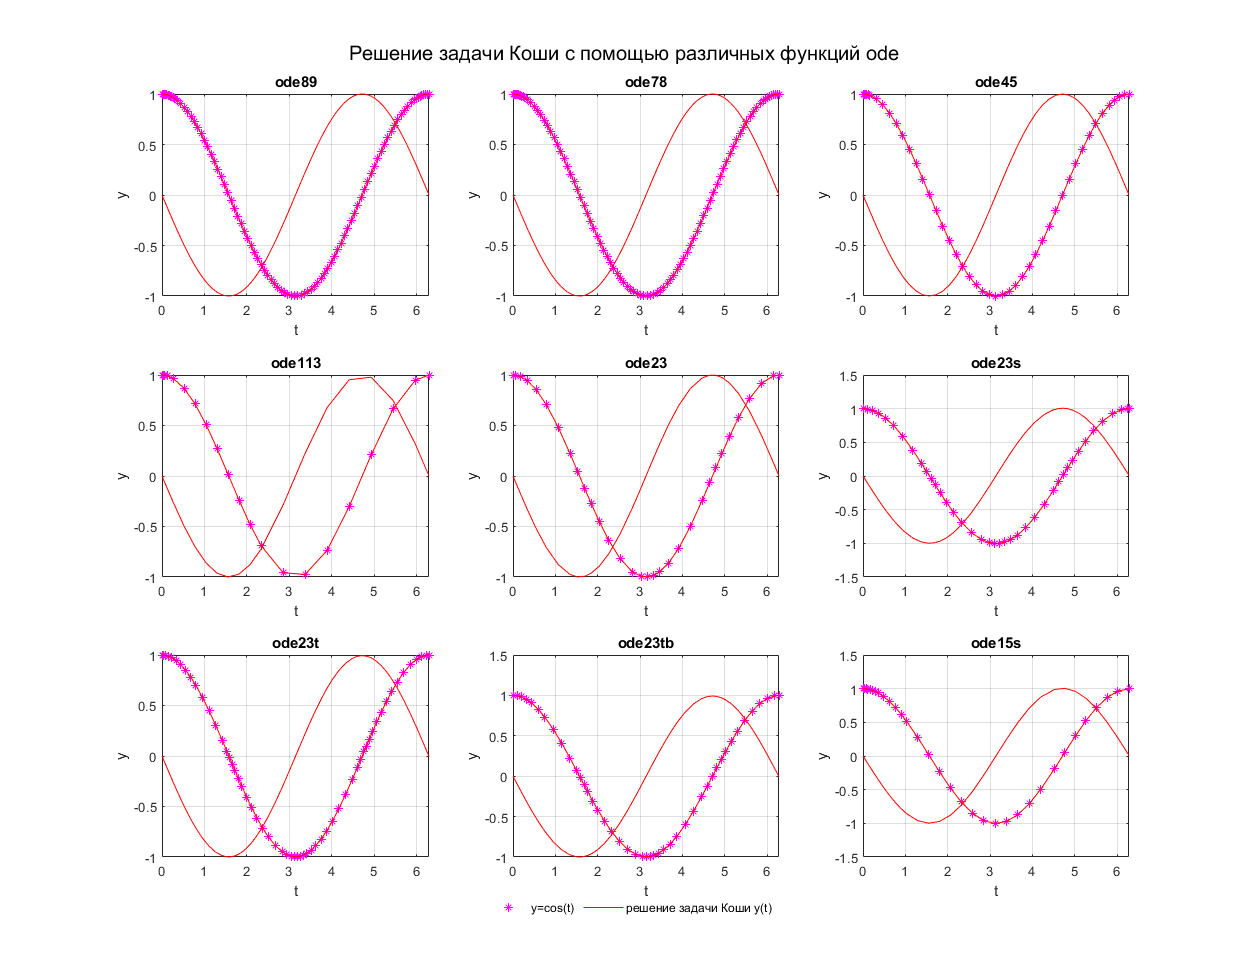

In [9]:
addpath("scripts")
set(gcf, 'PaperSize', [13 10], 'PaperPosition', [0 0 13 10])
sgtitle("Решение задачи Коши с помощью различных функций ode")

[t,Y]=ode89('yp3',[0 2*pi],[1 0]);
subplot(3,3,1)
plot(t,cos(t),'m*',t,Y,'r')
title("ode89")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode78('yp3',[0 2*pi],[1 0]);
subplot(3,3,2)
plot(t,cos(t),'m*',t,Y,'r')
title("ode78")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode45('yp3',[0 2*pi],[1 0]);
subplot(3,3,3)
plot(t,cos(t),'m*',t,Y,'r')
title("ode45")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode113('yp3',[0 2*pi],[1 0]);
subplot(3,3,4)
plot(t,cos(t),'m*',t,Y,'r')
title("ode113")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23('yp3',[0 2*pi],[1 0]);
subplot(3,3,5)
plot(t,cos(t),'m*',t,Y,'r')
title("ode23")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23s('yp3',[0 2*pi],[1 0]);
subplot(3,3,6)
plot(t,cos(t),'m*',t,Y,'r')
title("ode23s")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23t('yp3',[0 2*pi],[1 0]);
subplot(3,3,7)
plot(t,cos(t),'m*',t,Y,'r')
title("ode23t")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23tb('yp3',[0 2*pi],[1 0]);
subplot(3,3,8)
plot(t,cos(t),'m*',t,Y,'r')
title("ode23tb")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode15s('yp3',[0 2*pi],[1 0]);
subplot(3,3,9)
plot(t,cos(t),'m*',t,Y,'r')
title("ode15s")
xlabel("t")
ylabel("y")
grid on;

leg1=legend("y=cos(t)", "решение задачи Коши y(t)", "Location", "southoutside", "NumColumns", 2);
legend("boxoff")
set(leg1,'Position',[0.5 0.05 0.01 0.01]);
saveas(gcf, "images/graph5.png")

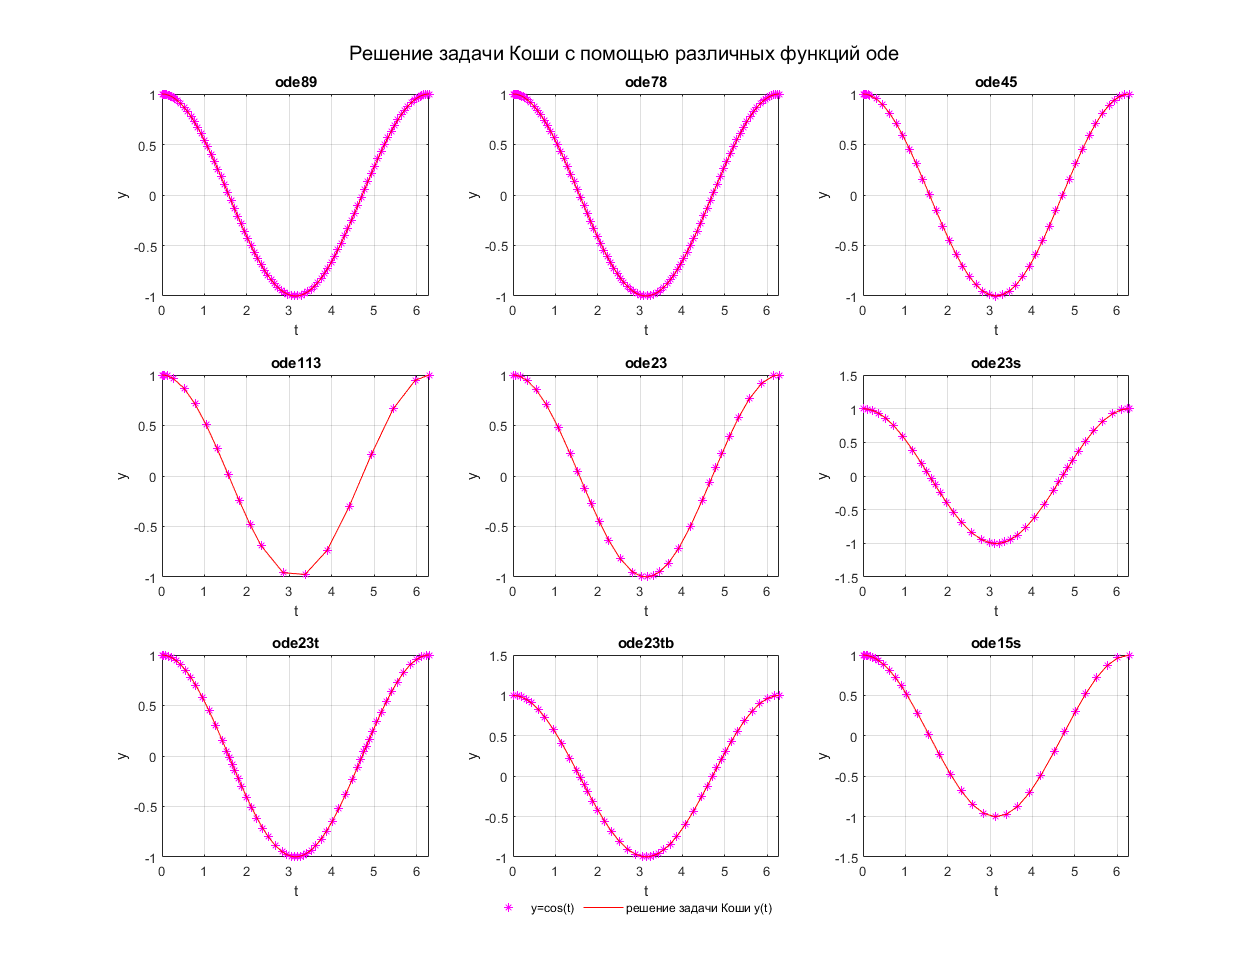

In [10]:
addpath("scripts")
set(gcf, 'PaperSize', [13 10], 'PaperPosition', [0 0 13 10])
sgtitle("Решение задачи Коши с помощью различных функций ode")

[t,Y]=ode89('yp3',[0 2*pi],[1 0]);
subplot(3,3,1)
plot(t,cos(t),'m*',t,Y(:,1),'r')
title("ode89")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode78('yp3',[0 2*pi],[1 0]);
subplot(3,3,2)
plot(t,cos(t),'m*',t,Y(:,1),'r')
title("ode78")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode45('yp3',[0 2*pi],[1 0]);
subplot(3,3,3)
plot(t,cos(t),'m*',t,Y(:,1),'r')
title("ode45")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode113('yp3',[0 2*pi],[1 0]);
subplot(3,3,4)
plot(t,cos(t),'m*',t,Y(:,1),'r')
title("ode113")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23('yp3',[0 2*pi],[1 0]);
subplot(3,3,5)
plot(t,cos(t),'m*',t,Y(:,1),'r')
title("ode23")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23s('yp3',[0 2*pi],[1 0]);
subplot(3,3,6)
plot(t,cos(t),'m*',t,Y(:,1),'r')
title("ode23s")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23t('yp3',[0 2*pi],[1 0]);
subplot(3,3,7)
plot(t,cos(t),'m*',t,Y(:,1),'r')
title("ode23t")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23tb('yp3',[0 2*pi],[1 0]);
subplot(3,3,8)
plot(t,cos(t),'m*',t,Y(:,1),'r')
title("ode23tb")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode15s('yp3',[0 2*pi],[1 0]);
subplot(3,3,9)
plot(t,cos(t),'m*',t,Y(:,1),'r')
title("ode15s")
xlabel("t")
ylabel("y")
grid on;

leg1=legend("y=cos(t)", "решение задачи Коши y(t)", "Location", "southoutside", "NumColumns", 2);
legend("boxoff")
set(leg1,'Position',[0.5 0.05 0.01 0.01]);
saveas(gcf, "images/graph6.png")

#### 4.

Возьмем функцию $y = ln(|{\tan(\frac{t}{2}+\frac{\pi}{4}}|)$ и будем считать ее решением задачи Коши для дифференциального уравнения первого порядка.
Получим это дифференциальное уравнение $y'= \frac{1}{cos(t)}$ и начальное условие y(0) = 0. Возьмем подсчет значений на интервале [0, $\pi$/2] так как на этом промежутке функция неразрывна.

Алгоритм решения:

0. Решим дифференциальное уравнение самостоятельно
1. Напишем скрипт-функцию возвращающую значение для функции $y` = 1/cos(t)$.
2. Посчитаем значение функции $y = ln(|{\tan(\frac{t}{2}+\frac{\pi}{4}}|)$ в точке 0.
3. Вызовем процедуру ode45 для данной функции на интервале [0;pi/2] и вектором начальных значений включающим значения y(0)
4. Построим на графике две функции: $y = ln(|{\tan(\frac{t}{2}+\frac{\pi}{4}}|)$ и результата численного решения задачи Коши, полученные в предыдущем пункте.
5. Повторим 3-4 шаг с другими функциями ode... и оценим результат.

Решим дифференциального уравнения самостоятельно:

$y'= \frac{1}{cos(t)}$

Преобразуем:

$\frac{dy}{dt} = \frac{1}{cos(t)}$

Домножим на dt:

$dy = \frac{dt}{cos(t)}$

Мы имеем уравнение с разделяющимися переменны вида $M(y)dy = N(x)dx$. Для дальнейшего решения проитегрируем обе части:

$\int_{}1 dy = \int_{}\frac{1}{cos(t)}dt$

Вычисляем интегралы:

$y = ln(\frac{sin(t)+1}{cos(t)}) + C $

$y = ln(|{tg(\frac{t}{2}+\frac{\pi}{4}}|) + C$

In [11]:
%%file scripts/yp4.m
function yp=yp4(t,y)
yp = 1/cos(t);

Created file 'C:\Users\user\Documents\Jupiter\MathModeling_Course\Lab4\scripts\yp4.m'.


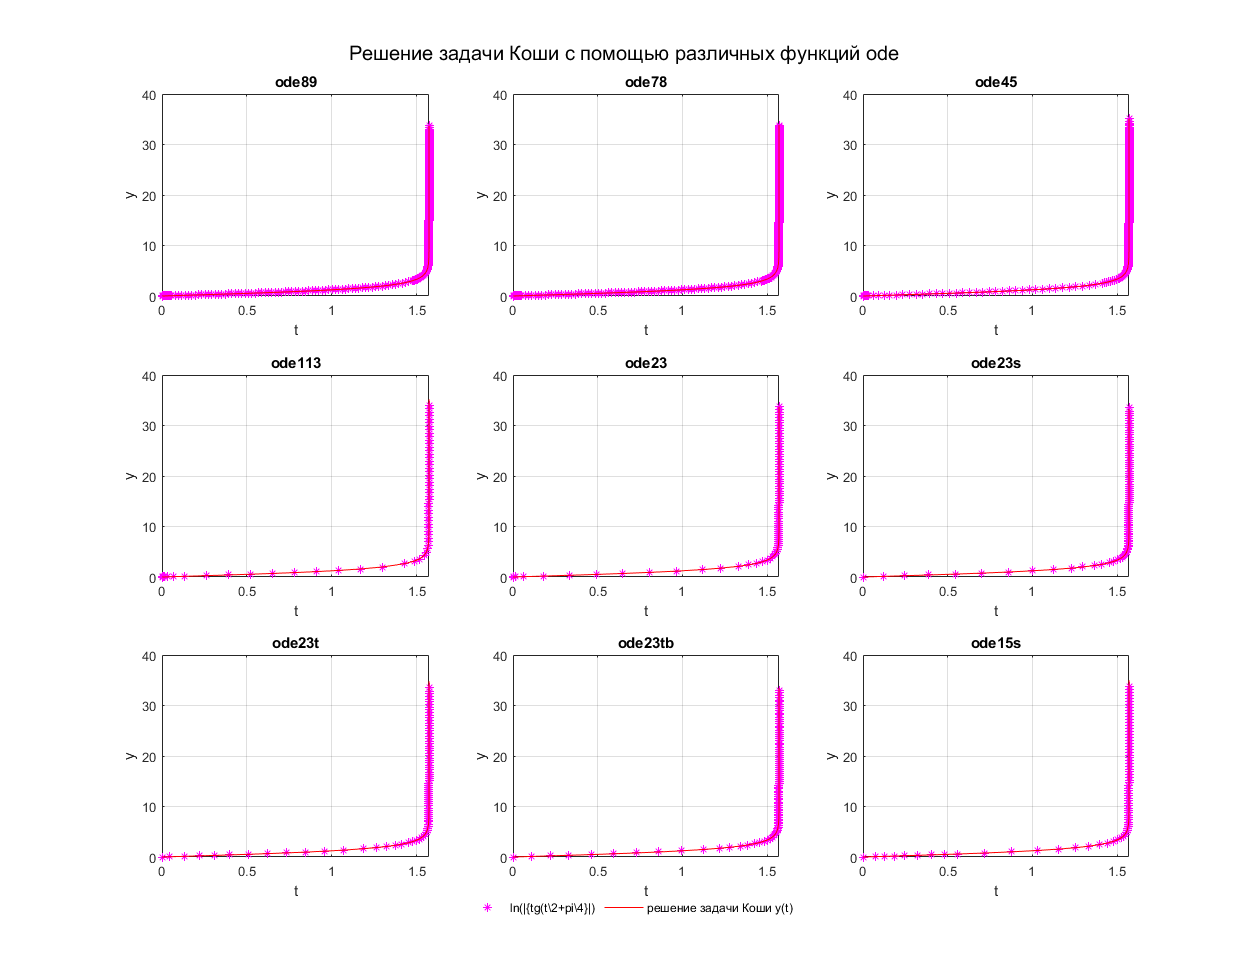

In [12]:
addpath("scripts")
warning('off','all')

set(gcf, 'PaperSize', [13 10], 'PaperPosition', [0 0 13 10])
sgtitle("Решение задачи Коши с помощью различных функций ode")

[t,Y]=ode89('yp4',[0 pi/2], 0);
subplot(3,3,1)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
%plot(t,2.^t./log(2),'m*',t,Y,'r');
title("ode89")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode78('yp4',[0 pi/2], 0);
subplot(3,3,2)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode78")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode45('yp4',[0 pi/2], 0);
subplot(3,3,3)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode45")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode113('yp4',[0 pi/2], 0);
subplot(3,3,4)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode113")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23('yp4',[0 pi/2], 0);
subplot(3,3,5)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode23")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23s('yp4',[0 pi/2], 0);
subplot(3,3,6)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode23s")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23t('yp4',[0 pi/2], 0);
subplot(3,3,7)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode23t")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23tb('yp4',[0 pi/2], 0);
subplot(3,3,8)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode23tb")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode15s('yp4',[0 pi/2], 0);
subplot(3,3,9)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode15s")
xlabel("t")
ylabel("y")
grid on;

leg1=legend("ln(|{tg(t\2+pi\4}|)", "решение задачи Коши y(t)", "Location", "southoutside", "NumColumns", 2);
legend("boxoff")
set(leg1,'Position',[0.5 0.05 0.01 0.01]);
saveas(gcf, "images/graph7.png")

Попробуем построить те же графики для диапазона значений [0;$2\pi$]:

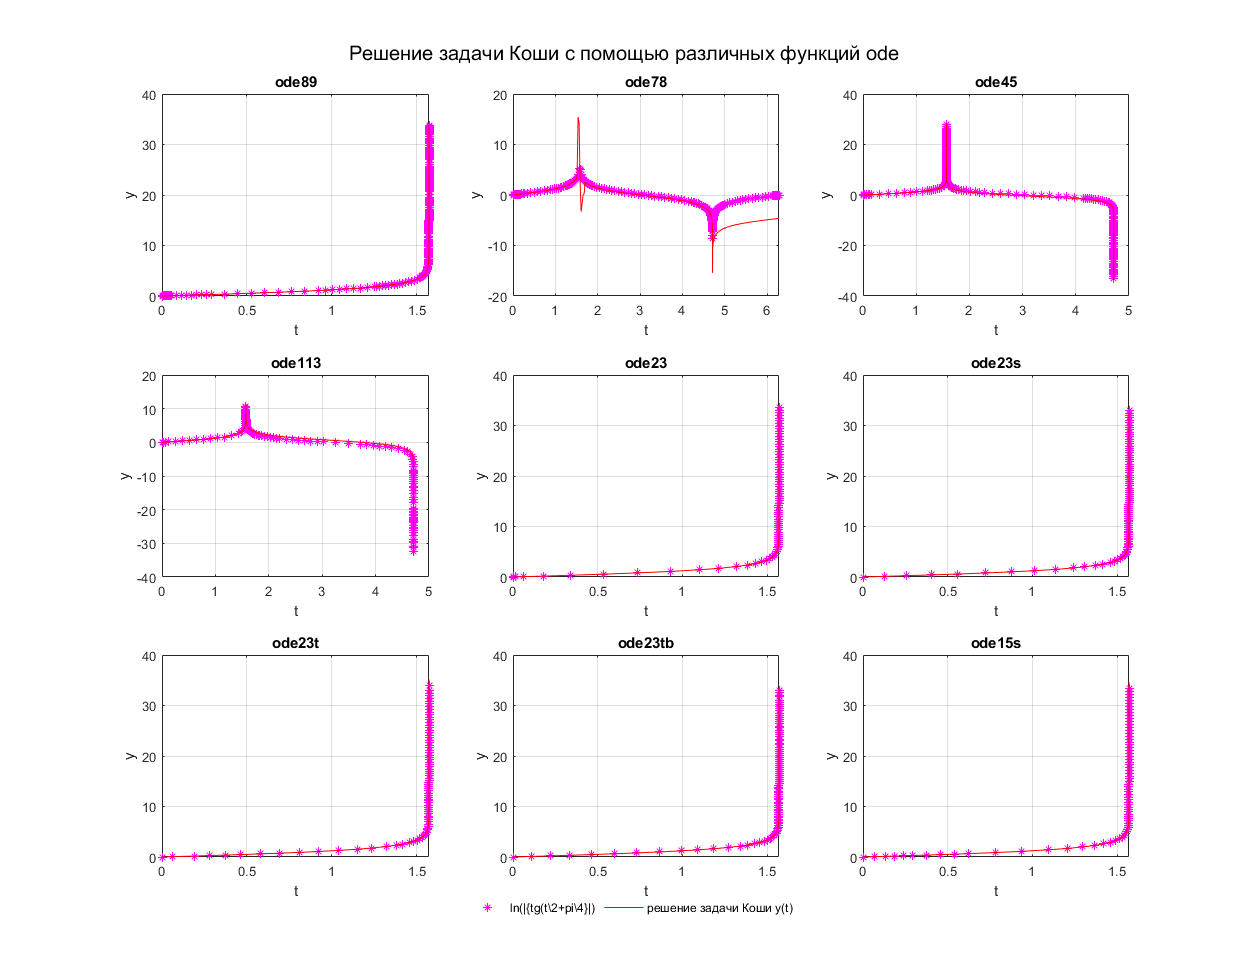

In [13]:
addpath("scripts")
warning('off','all')

set(gcf, 'PaperSize', [13 10], 'PaperPosition', [0 0 13 10])
sgtitle("Решение задачи Коши с помощью различных функций ode")

[t,Y]=ode89('yp4',[0 pi*2], 0);
subplot(3,3,1)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
%plot(t,2.^t./log(2),'m*',t,Y,'r');
title("ode89")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode78('yp4',[0 pi*2], 0);
subplot(3,3,2)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode78")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode45('yp4',[0 pi*2], 0);
subplot(3,3,3)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode45")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode113('yp4',[0 pi*2], 0);
subplot(3,3,4)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode113")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23('yp4',[0 pi*2], 0);
subplot(3,3,5)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode23")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23s('yp4',[0 pi*2], 0);
subplot(3,3,6)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode23s")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23t('yp4',[0 pi*2], 0);
subplot(3,3,7)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode23t")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode23tb('yp4',[0 pi*2], 0);
subplot(3,3,8)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode23tb")
xlabel("t")
ylabel("y")
grid on;

[t,Y]=ode15s('yp4',[0 pi*2], 0);
subplot(3,3,9)
plot(t,log(abs(tan(t./2+pi./4))),'m*',t,Y,'r');
title("ode15s")
xlabel("t")
ylabel("y")
grid on;

leg1=legend("ln(|{tg(t\2+pi\4}|)", "решение задачи Коши y(t)", "Location", "southoutside", "NumColumns", 2);
legend("boxoff")
set(leg1,'Position',[0.5 0.05 0.01 0.01]);
saveas(gcf, "images/graph8.png")

Можем заметить что разные функции по разному справились с данной задачей:

Так например ode45 и ode113 справились с задачей.

Функции ode23, ode23s, ode23t, ode23tb, ode15s и ode89 построили лишь первую часть графика([0;$\pi/2$]).

Функция ode78 постоила некорректное решение.

#### Основные источники ошибок

1. Математическое округление при численных вычислениях в MatLab.[Слабая степень влияния]
2. Погрешность функций ode... в Matlab (разные ode функции имеют разную точность). [Сильная степень влияния]
3. Наличие производной в точке начального условия. [Сильная степень влияния]

#### Вывод


В данной лабораторной работе мы изучили способы решение задачи Коши.
Построив графики решения разных дифференциальных уравнений и проанализировав работу различных функций MatLab (ode...),
можно сделать вывод что интрументарий функций MatLab справляется с подобного рода задачами.
В лабораторной работе я использовал 9 различных функций. Они отличаются точностью, частотой разбиения, жесткостью(зависит от различие в масштабировании в задаче) некоторые имеют свои нюансы использования.
Так например ode45 является самым простым и удобным вариантом. Однако ode23, ode78, ode89 и ode113 могут быть более эффективными, чем ode45 для проблем с более свободными или более высокими требованиями точности.
Также было проведено исследование на своей функции, дифференциальное уравнение которой: $y'= \frac{1}{cos(t)}$. Были рассмотрены два варинта решения с помощбю функций MatLab:
1. На интервале, где функция неразрывна
2. На интервале, где функция разрывна

Функции по разному справились с этой задачей на интервале, где функция разрывна(в отличии от предыдущих задач из задания лабораторной работы, где результат функций отличался лишь точнотью/частотой разбиения). Соответсвенно выбор функции ode зависит от конкретной задачи.